In [1]:
import pandas as pd
import numpy as np
import pulp

import sys
sys.path.insert(0, '../..')
import bottleneck_assignment
import assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

import time

In [2]:
helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
    np.array([
        [8, 2, 3, 3],
        [2, 7, 5, 8],
        [0, 9, 8, 4],
        [2, 5, 6, 3]
    ]),
    [1, 1, 1, 1]
)

helper.solve(verbose=True)

Searching between 3 and 9
Searching between 3 and 7
Searching between 3 and 6


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


array([4, 5])

In [3]:
helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
    np.array([
        [np.pi, np.sqrt(3), 54392],
        [0, np.e ** 3, np.e ** 3],
        [-2, np.sin(np.pi / 8), 4]
    ]),
    [1, 1, 1]
)

helper.solve(verbose=True)

4.0

In [4]:
prob_df = pd.read_csv('../../data/data.csv', index_col=0)
capacity_df = prob_df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = prob_df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = prob_df[type_] - increase_from_best_df['Best']
increase_from_best_df = increase_from_best_df[types]

helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
    increase_from_best_df.to_numpy(),
    capacity_df.sort_index().to_numpy()
)

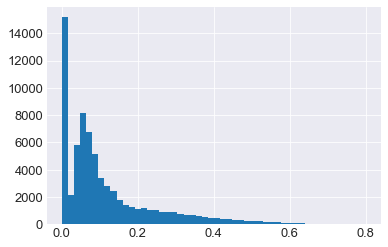

In [5]:
plt.hist(increase_from_best_df.to_numpy().flatten(), bins=50)
plt.show()

In [6]:
t0 = time.time()
helper.solve(verbose=True)
print(f'Took {time.time() - t0:.4f} seconds')

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.021094955 and 0.801554275


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.09667532000000001 and 0.801554275


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.203843269 and 0.801554275


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.31724527799999996 and 0.801554275


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.409406607 and 0.801554275
Searching between 0.409406607 and 0.48743338199999997
Searching between 0.409406607 and 0.44247619600000004


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.42505548300000007 and 0.44247619600000004
Searching between 0.42505548300000007 and 0.4337425020000001


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.42918097399999994 and 0.4337425020000001


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.43151666199999994 and 0.4337425020000001
Searching between 0.43151666199999994 and 0.432711237
Searching between 0.43151666199999994 and 0.432126689


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.431810356 and 0.432126689


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.4320012750000001 and 0.432126689
Searching between 0.4320012750000001 and 0.43212075400000005
Took 55.7815 seconds


In [6]:
constraints = [0.43200128, 0.43200557, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

summed_probs = []
compare_dfs = []

for constraint in constraints:
    helper = assignment.AssignmentHelper()
    helper.update_constraints(fairness_best_constraint=constraint)
    
    sol_df = helper.ip_solve()
    if sol_df is False:
        summed_probs.append(False)
        compare_dfs.append(False)
    else:
        summed_probs.append(pulp.value(helper.prob.objective))
        compare_dfs.append(helper.compare_prob(sol_df))
    
    print(constraint, pulp.LpStatus[helper.prob.status])

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.43200128 Not Solved
0.43200557 Optimal
0.45 Optimal
0.5 Optimal
0.55 Optimal
0.6 Optimal
0.65 Optimal
0.7 Optimal


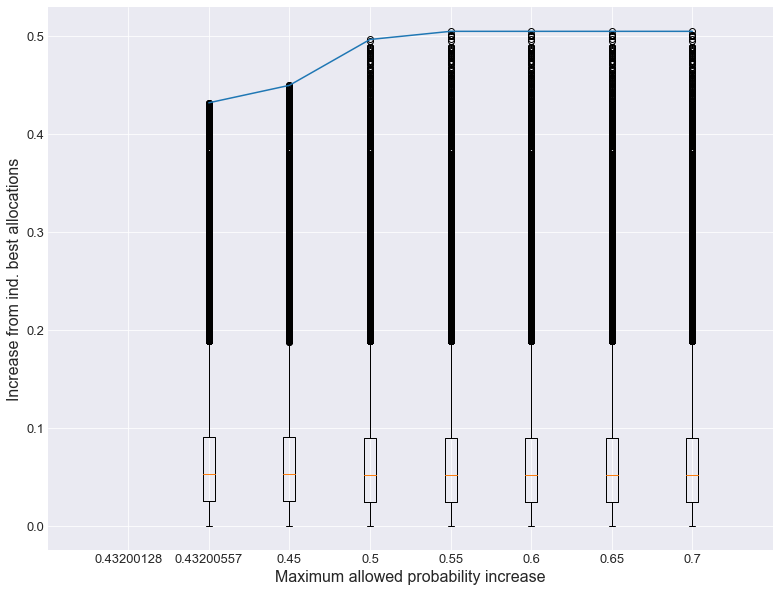

In [7]:
f, ax1 = plt.subplots(figsize=(13, 10))

for c_idx, c in enumerate(constraints):
    df = compare_dfs[c_idx]
    
    if df is not False:
        ax1.boxplot(
            df['Input_to_best'],
            positions=[c_idx],
            # widths=[0.1]
        )

ax1.plot(
    [i for i in range(len(constraints))],
    [df['Input_to_best'].max()
     if df is not False else np.nan
     for df in compare_dfs]
)
        
# ax1.axhline(0.43200557, c='red')
    
ax1.set_xlabel('Maximum allowed probability increase', fontsize=16)
ax1.set_ylabel('Increase from ind. best allocations', fontsize=16)
ax1.set_xlim(-1, len(constraints))

ax1.set_xticks([i for i in range(len(constraints))])
ax1.set_xticklabels(constraints)

plt.show()

In [8]:
summed_probs

[False,
 3628.099694887985,
 3627.7111442259857,
 3627.0664119999856,
 3627.0456566409853,
 3627.0456566409853,
 3627.0456566409853,
 3627.0456566409853]

In [9]:
reductions = []

for prob in summed_probs:
    if prob is False:
        reductions.append(False)
    else:
        reductions.append((4082 - prob) / 4082)

reductions

[False,
 0.11119556715140001,
 0.1112907534968188,
 0.11144869867712259,
 0.11145378328246319,
 0.11145378328246319,
 0.11145378328246319,
 0.11145378328246319]

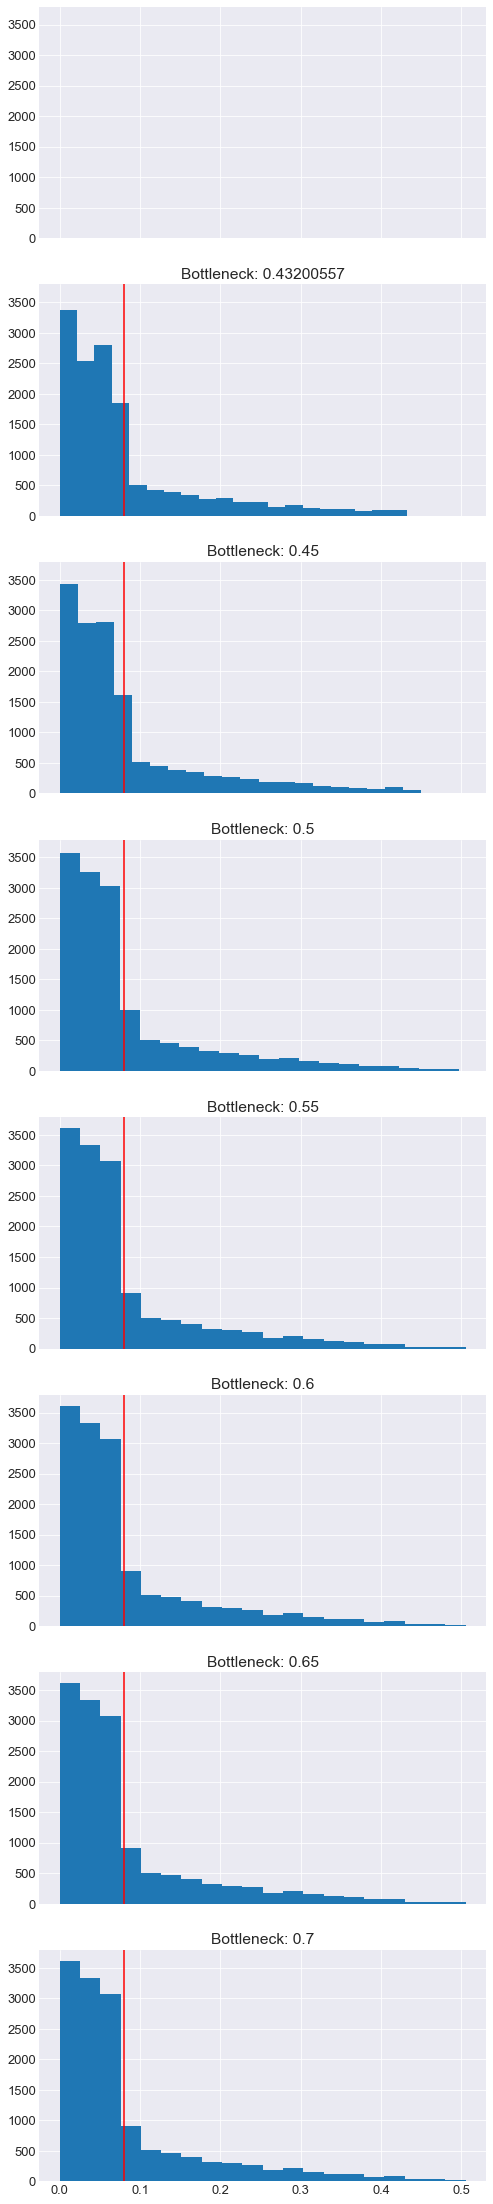

In [16]:
f, ax = plt.subplots(len(constraints), 1,
                     figsize=(8, 40), sharex=True, sharey=True)

for c_idx, c in enumerate(constraints):
    df = compare_dfs[c_idx]
    
    if df is not False:
        ax[c_idx].hist(df['Input_to_best'], bins=20)
        ax[c_idx].axvline(df['Input_to_best'].mean(), c='r')
        ax[c_idx].set_title(f'Bottleneck: {c}')

plt.show()